1.Classify complexity of these tasks:

     -Checking if a list has duplicates.
     -Sorting a dataset of 1M entries.
     -Training k-NN on n samples.
     -Running BFS on a graph with V vertices, E edges.


In [1]:
#Checking if a list has duplicates.
# Method 1: Using a set (efficient way)
def has_duplicates_set(lst):
    seen = set()
    for item in lst:
        if item in seen:
            return True
        seen.add(item)
    return False


# Method 2: Using sorting
def has_duplicates_sort(lst):
    lst_sorted = sorted(lst)
    for i in range(1, len(lst_sorted)):
        if lst_sorted[i] == lst_sorted[i - 1]:
            return True
    return False


# Method 3:  nested loops (least efficient)
def has_duplicates_naive(lst):
    for i in range(len(lst)):
        for j in range(i + 1, len(lst)):
            if lst[i] == lst[j]:
                return True
    return False


# Example usage
data = [1, 2, 3, 4, 5, 2]

print("Set method:", has_duplicates_set(data))     # True
print("Sort method:", has_duplicates_sort(data))   # True
print("loops method:", has_duplicates_naive(data)) # True


Set method: True
Sort method: True
Naive method: True


Summary of Big-Theta complexities

Loops approach: Θ(
𝑛
2
n
2
)

Sorting approach: Θ(
𝑛
log
⁡
𝑛
nlogn)

Hash set approach: Θ(
𝑛
n) on average

In [2]:
#Sorting a dataset of 1M entries.
import random
import time

# Generate 1M random integers
data = [random.randint(0, 10**6) for _ in range(10**6)]

start = time.time()
sorted_data = sorted(data)   # Uses Timsort (O(n log n))
end = time.time()

print(f"Sorting took {end - start:.2f} seconds")


Sorting took 0.45 seconds


Time complexity:
𝑂
(
𝑛
log
⁡
𝑛
)
O(nlogn)

-Training k-NN on n samples.

The Big-Theta complexity of training k-NN is Θ(
𝑛
⋅
𝑑
n⋅d)

if the data is only stored, and Θ(
𝑛
log
⁡
𝑛
nlogn) if an indexing structure is built.


Running BFS on a graph with V vertices, E edges.

Time Complexity:

Visiting all vertices takes Θ(
𝑉
V).

Traversing all edges takes Θ(
𝐸
E).

Therefore, total time = Θ(
𝑉
+
𝐸
V+E).

Space Complexity:

A queue to store vertices can hold up to Θ(
𝑉
V).

A visited array (or similar structure) requires Θ(
𝑉
V).

Storing the graph itself requires Θ(
𝑉
+
𝐸
V+E) (adjacency list).

Hence, total auxiliary space = Θ(
𝑉
V), plus the graph storage.


the Big-Theta complexity of BFS is:

Time: Θ(
𝑉
+
𝐸
V+E)

Space: Θ(
𝑉
V) auxiliary (excluding the graph storage).

In [1]:
#Write your own binary search and prove its Θ(log n).



def binary_search(arr, target):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1



Proof of Θ(log n) Complexity

1.	Observation:
o	At each step, binary search halves the search interval.
o	Starting with nnn elements → n/2n/2n/2 → n/4n/4n/4 → … until 1 element remains.
2.	Recurrence Relation:
o	Let T(n)T(n)T(n) = time to search in nnn elements.
o	At each step: one comparison (Θ(1)) + recursive search in half:
T(n)=T(n/2)+Θ(1)T(n) = T(n/2) + Θ(1)T(n)=T(n/2)+Θ(1)
3.	Expansion:
T(n)=T(n/2)+Θ(1)=T(n/4)+Θ(1)+Θ(1)=T(n/8)+3Θ(1)T(n) = T(n/2) + Θ(1) = T(n/4) + Θ(1) + Θ(1) = T(n/8) + 3Θ(1) T(n)=T(n/2)+Θ(1)=T(n/4)+Θ(1)+Θ(1)=T(n/8)+3Θ(1)
After kkk steps:
T(n)=T(n/2k)+kΘ(1)T(n) = T(n/2^k) + kΘ(1)T(n)=T(n/2k)+kΘ(1)
4.	Stopping condition:
o	Search space reduces to 1 when n/2k=1n/2^k = 1n/2k=1.
o	Solve: k=log⁡2nk = \log_2 nk=log2n.
5.	Final Complexity:
T(n)=Θ(log⁡n)T(n) = Θ(\log n)T(n)=Θ(logn)


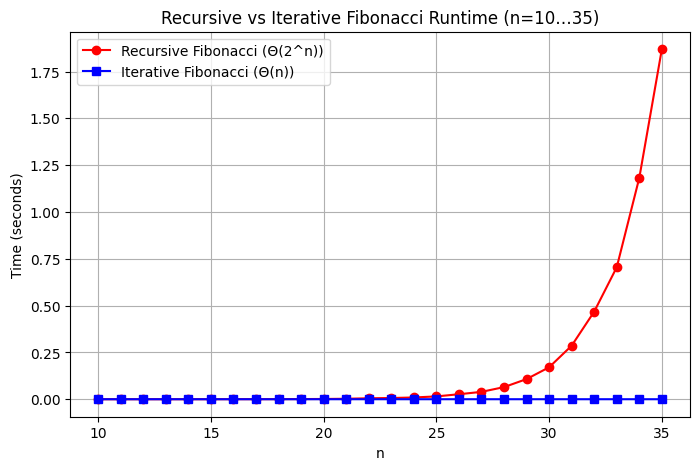

In [3]:
#Compare runtime of:

#fib_recur(n) vs an iterative Fibonacci implementation.
#Plot time taken for n = 10…40.

import time
import matplotlib.pyplot as plt

# Recursive Fibonacci (inefficient)
def fib_recur(n):
    if n <= 1:
        return n
    return fib_recur(n-1) + fib_recur(n-2)

# Iterative Fibonacci (efficient)
def fib_iter(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

# Measure runtimes
n_values = list(range(10, 36))
recur_times, iter_times = [], []

for n in n_values:
    # Recursive Fibonacci timing
    start = time.time()
    fib_recur(n)
    recur_times.append(time.time() - start)

    # Iterative Fibonacci timing
    start = time.time()
    fib_iter(n)
    iter_times.append(time.time() - start)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(n_values, recur_times, label="Recursive Fibonacci (Θ(2^n))", marker="o", color="red")
plt.plot(n_values, iter_times, label="Iterative Fibonacci (Θ(n))", marker="s", color="blue")
plt.xlabel("n")
plt.ylabel("Time (seconds)")
plt.title("Recursive vs Iterative Fibonacci Runtime (n=10…35)")
plt.legend()
plt.grid(True)
plt.show()
